In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7039 - loss: 0.8554 - val_accuracy: 0.6744 - val_loss: 0.9474
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.7178 - loss: 0.8110 - val_accuracy: 0.6870 - val_loss: 0.9068
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7351 - loss: 0.7616 - val_accuracy: 0.6765 - val_loss: 0.9551
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7558 - loss: 0.7037 - val_accuracy: 0.6900 - val_loss: 0.9171
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7658 - loss: 0.6704 - val_accuracy: 0.6693 - val_loss: 0.9869
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7794 - loss: 0.6309 - val_accuracy: 0.6889 - val_loss: 0.9500
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7899 - loss: 0.6017 - val_accuracy: 0.6935 - val_loss: 0.9386
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7996 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6938 - loss: 0.9559
Test accuracy: 0.690500020980835


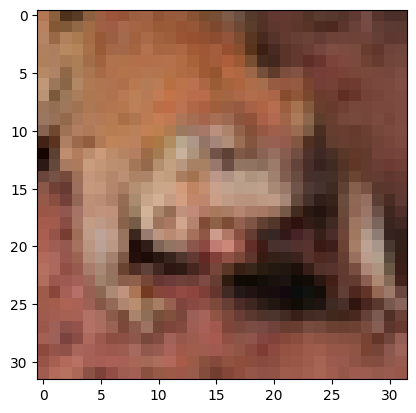

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: 6


In [ ]:
index = 5
plt.imshow(X_test[index])
plt.show()
prediction = model.predict(np.expand_dims(X_test[index], axis=0))
print("Predicted class:", np.argmax(prediction))

In [7]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

model = tf.keras.models.load_model("model.h5")
class_names = ['Class 1', 'Class 2']  # Replace with your actual class names

st.title("Image Classification App")

uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = Image.open(uploaded_file).resize((64, 64))
    st.image(image, use_column_width=True)

    img_array = np.expand_dims(np.array(image) / 255.0, axis=0)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    st.write("Prediction:", predicted_class)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)